<a href="https://colab.research.google.com/github/lleiva25/Project4/blob/main/Part1_Clean_Merge_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#Import Dependencies
import pandas as pd
from os import path
from pathlib import Path
import csv
import matplotlib.pyplot as plt

# Cleaning Datasets

<h1>California Farmland (Vanessa Vaquez)</h1>

In [ ]:
# Read the csv file from my downloads folder into a Pandas dataframe
ca_important_farmland_df = pd.read_csv(("/content/drive/MyDrive/Project4/California_Important_Farmland_Most_Recent.csv"), header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')

# Review the DataFrame
ca_important_farmland_df.head(100)

# Delete Non-Relevant Columns
ca_important_farmland_update_df = ca_important_farmland_df.drop (columns = [
    'county_nam',
    'Shape_Leng',
    'polygon_ty',
    'PopupInfo',
    'polygon_ac'

])

ca_important_farmland_update_df

# Type of dataset
ca_important_farmland_update_df.info()


# Convert float data types to integers
ca_important_farmland_update_df[['ShapeSTArea', 'ShapeSTLength']] = ca_important_farmland_update_df[['ShapeSTArea', 'ShapeSTLength']].astype(int)


# Renaming the columns
ca_important_farmland_update_df = ca_important_farmland_update_df.rename(columns={
    'OBJECTID': 'Object_ID',
    'upd_year':'Updated_Year',
    'MetadataLink' : 'Meta_data_link',
    'County' : "County's Name",
    'ShapeSTLength' : 'Length of Area (meters)',
    'ShapeSTArea' : 'Area (sqm_meters)'

})


# Rearranging the columms
ca_important_farmland_update_df = ca_important_farmland_update_df[[
    'Object_ID',
    'Code',
    "County's Name",
    'Updated_Year',
    'Area (sqm_meters)',
    'Length of Area (meters)',
    'Meta_data_link'
]]

# Converting squared meters to acres
#1 Acre = 4046.860107422 Square Meter
sqm_to_acres = 4046.860107422

# Convert the column from squared meters to acres
ca_important_farmland_update_df['Area (sqm_meters)'] = ca_important_farmland_update_df['Area (sqm_meters)'] / sqm_to_acres
# Convert the column lengther to acres
ca_important_farmland_update_df['Length of Area (meters)'] = ca_important_farmland_update_df['Length of Area (meters)'] / sqm_to_acres
# Changing the data type from float to int
# Convert float data types to integers
ca_important_farmland_update_df[['Area (sqm_meters)','Length of Area (meters)']] = ca_important_farmland_update_df[['Area (sqm_meters)', 'Length of Area (meters)']].astype(int)

#Rename the meters to acres
ca_important_farmland_update_df = ca_important_farmland_update_df.rename(columns={
    'Area (sqm_meters)': 'Area (acres)',
    'Length of Area (meters)' : 'Length of Area (acres)'
})

#Save file as a csv
ca_important_farmland_update_df.to_csv('2017-2019_California_Important_Farmland_Most_Recent.csv')

<h1>California WildFires Dataset Clean Up (Kevin Tian)</h1>

In [ ]:
#Read csv file
df_fire = pd.read_csv('/content/drive/MyDrive/Project4/California_Fire_Incidents.csv')

#Rearrange dataframe
df_fire_c = df_fire[['AcresBurned','Counties','CountyIds','Latitude','Longitude','ArchiveYear']]

#Filter datafrane from 2017 to 2019
df = df_fire_c[df_fire_c['ArchiveYear'] > 2017]
df2 = df[df['ArchiveYear'] < 2020]

#Overwrite df
df_fire_c = df2

#Remove commas in CountyIds
for index, row in df_fire_c.iterrows():
    if ',' in row['CountyIds']:
        df_fire_c.drop(index, inplace = True)

#Drop NA values
df_fire_c.dropna(inplace=True)

#Drop Lat that are zero
for index, row in df_fire_c.iterrows():
    if row['Latitude'] == 0:
        df_fire_c.drop(index, inplace = True)

#Save to csv
df_fire_c.to_csv('California_Fire_Incidents_Cleaned.csv')

<h1>California Agriculture Census Clean Up(Leslie Leiva)</h1>

In [ ]:

#File pathways
path_2017 = '/content/drive/MyDrive/Project4/2017_Census_California.csv'
path_2018 = '/content/drive/MyDrive/Project4/2018_Census_California.csv'
path_2019 = '/content/drive/MyDrive/Project4/2019California_Agriculture_Statistics_Service.csv'


#Create a dataframe from the read csv files
df_2017 = pd.DataFrame(pd.read_csv(path_2017))
df_2018 = pd.DataFrame(pd.read_csv(path_2018))
df_2019 = pd.DataFrame(pd.read_csv(path_2019))


#Merge the data frames into one large dataset
df_merge = pd.concat([df_2017, df_2018, df_2019])
df_merge.info()

#Delete rows that do not have 'Harvested Acres','Yield','Production','Price(P/U)' & 'Unit' information
df_merge = df_merge[df_merge[' Harvested Acres'] != '  ']
df_merge = df_merge[df_merge[' Yield'] != '  ']
df_merge = df_merge[df_merge[' Price P/U'] != '  ']
df_merge = df_merge[df_merge[' Unit'] != '    ']
df_merge = df_merge[df_merge[' Unit'] != '  ']

#Delete Non Relevant Columns
df_merge = df_merge.drop(columns=[
    ' Commodity Code',
    ' County',
    ' Harvested Acres',
    ' Yield'
])

#Change type to float instead of string
df_merge[[' Price P/U',' Production',' Value']] = df_merge[[' Price P/U',' Production',' Value']].astype(float)

#Rename Value to Total Value($)
df_merge = df_merge.rename(columns={' Value': 'Total Value($)'})

#Create a column showing Price per individual labeled as P/I
df_merge['Price P/I ($)'] = round(df_merge[' Price P/U']/df_merge[' Production'],2)

#Rearrange columns
df_merge = df_merge[[
    'Year',
    ' County Code',
    ' Crop Name',
    ' Production',
    ' Unit',
    'Price P/I ($)',
    ' Price P/U',
    'Total Value($)'
]]

#Save file as a csv
df_merge.to_csv('2017-2019_California_Agriculture_Census_Cleaned.csv')

#See modified dataframe
df_merge.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6361 entries, 0 to 2105
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              6361 non-null   int64 
 1    Commodity Code   6361 non-null   int64 
 2    Crop Name        6361 non-null   object
 3    County Code      6361 non-null   int64 
 4    County           6361 non-null   object
 5    Harvested Acres  6361 non-null   object
 6    Yield            6361 non-null   object
 7    Production       6361 non-null   object
 8    Price P/U        6361 non-null   object
 9    Unit             6361 non-null   object
 10   Value            6361 non-null   object
dtypes: int64(3), object(8)
memory usage: 596.3+ KB


,Year,County Code,Crop Name,Production,Unit,Price P/I ($),Price P/U,Total Value($)
16,2017,7,ALMONDS ALL,29700.0,Tons,0.16,4653.03,1.381950e+08
18,2017,11,ALMONDS ALL,64200.0,Tons,0.07,4785.64,3.072380e+08
19,2017,19,ALMONDS ALL,258000.0,Tons,0.02,4526.00,1.167708e+09
20,2017,21,ALMONDS ALL,44200.0,Tons,0.11,4912.22,2.171200e+08
21,2017,29,ALMONDS ALL,264000.0,Tons,0.02,4676.98,1.234724e+09


# Furthur Clean-up & Merging Data Sets (Leslie Leiva)

In [ ]:
#Path to the files
path1 = '/content/drive/MyDrive/Project4/2017-2019_California_Agriculture_Census_Cleaned.csv'
path2 = '/content/drive/MyDrive/Project4/California_Fire_Incidents_Cleaned.csv'
path3 = '/content/drive/MyDrive/Project4/2017-2019_California_Important_Farmland_Most_Recent.csv'


#Read and turn files into dataframe
df1 = pd.DataFrame(pd.read_csv(path1,index_col=0))
df2 = pd.DataFrame(pd.read_csv(path2,index_col=0))
df3 = pd.DataFrame(pd.read_csv(path3,index_col=0))
#Put dataframe in range of 2017-2019 for df2 & df3
years = [2013,2014,2015,2016,2017,2019,2020]

for year in years:
  df1 = df1[df1['Year'] != year]
  df2 = df2[df2['ArchiveYear'] != year]
  df3 = df3[df3['Updated_Year'] != year]

#Drop values that have a ","
list_commas = ['42,56','28,49','28,48','27,40','6,11,17,23','45,53', '19,56', '28,57', '6,17,23','62,37']
for comma in list_commas:
  df2 = df2[df2['CountyIds'] != comma]

#Rename 'County's Name' to 'Counties'
df1 = df1.rename(columns={' County Code' : 'CountyIds'})
df3 = df3.rename(columns={"County's Name" : 'Counties',
                          'Updated_Year':'ArchiveYear'})

#Drop values greater than 58 since there are only 58 counties in California
df1 = df1[df1['CountyIds'] <= 58]

#Drop "State of Oregon" & 'State of Nevada' from Counties
states = ["State of Oregon",'State of Nevada']
for state in states:
  df3 = df3[df3["Counties"] != state]

#Drop df3 columns
df3 = df3.drop(columns= ['Object_ID', 'Code','Length of Area (acres)', 'Meta_data_link'])

#Merging dataframes
merged_df1 = pd.merge(df2, df3, on=["Counties",'ArchiveYear'])

#Save merged and further cleaned dataset
df1.to_csv('/content/drive/MyDrive/Project4/2018_California_Agriculture_Cleaned.csv')
merged_df1.to_csv('/content/drive/MyDrive/Project4/2018_California_Farmland_Fire_Acres_Burned.csv')

#See merged dataset
merged_df1.head()

,AcresBurned,Counties,CountyIds,Latitude,Longitude,ArchiveYear,Area (acres)
0,38008.0,Siskiyou,47,41.893332,-122.534655,2018,255
1,38008.0,Siskiyou,47,41.893332,-122.534655,2018,43
2,38008.0,Siskiyou,47,41.893332,-122.534655,2018,65
3,38008.0,Siskiyou,47,41.893332,-122.534655,2018,37
4,38008.0,Siskiyou,47,41.893332,-122.534655,2018,1131


In [ ]:
df1.head()

,Year,CountyIds,Crop Name,Production,Unit,Price P/I ($),Price P/U,Total Value($)
16,2018,7,ALMONDS ALL,32300.0,Tons,0.15,4812.32,1.554380e+08
17,2018,9,ALMONDS ALL,50.0,Tons,87.20,4360.00,2.180000e+05
18,2018,11,ALMONDS ALL,72500.0,Tons,0.06,4494.33,3.258390e+08
19,2018,19,ALMONDS ALL,240000.0,Tons,0.02,4626.00,1.110240e+09
20,2018,21,ALMONDS ALL,46700.0,Tons,0.10,4819.83,2.250860e+08


# Python Plots and Graphs (Leslie Leiva)

In [16]:

#Path to file
path = "/content/drive/MyDrive/Project4/2018_California_Agriculture_Cleaned.csv"

#Read and turn csv to dataframe
df = pd.DataFrame(pd.read_csv(path,index_col=0))

#Drop unneeded columns
df = df.drop(columns=['Price P/I ($)','Year'])

#Create a dictionary with countyIds and their names in California
CA_county_codes = {
    1:'Alameda',
    2:'Alpine',
    3:'Amador',
    4:'Butte',
    5:'Calaveras',
    6:'Colusa',
    7:'Contra Costa',
    8:'Del Norte',
    9:'El Dorado',
    10:'Fresno',
    11:'Glenn',
    12:'Humboldt',
    13:'Imperial',
    14:'Inyo',
    15:'Kern',
    16:'Kings',
    17:'Lake',
    18:'Lassen',
    19:'Los Angeles',
    20:'Madera',
    21:'Marin',
    22:'Mariposa',
    23:'Mendocino',
    24:'Merced',
    25:'Modoc',
    26:'Mono',
    27:'Monterey',
    28:'Napa',
    29:'Nevada',
    30:'Orange',
    31:'Placer',
    32:'Plumas',
    33:'Riverside',
    34:'Sacramento',
    35:'San Benito',
    36:'San Bernardino',
    37:'San Diego',
    38:'San Francisco',
    39:'San Joaquin',
    40:'San Luis Obispo',
    41:'San Mateo',
    42:'Santa Barbara',
    43:'Santa Clara',
    44:'Santa Cruz',
    45:'Shasta',
    46:'Sierra',
    47:'Siskiyou',
    48:'Solano',
    49:'Sonoma',
    50:'Stanislaus',
    51:'Sutter',
    52:'Tehama',
    53:'Trinity',
    54:'Tulare',
    55:'Tuolumne',
    56:'Ventura',
    57:'Yolo',
    58:'Yuba',
}

#Create a new list for storying County names that associate with County ID
counties_list = []

#Loop through each County ID row to find the paired County Name
for id in df['CountyIds']:
  if  id in CA_county_codes.keys():
    counties_list.append(CA_county_codes[id])

#Create a new column for County Name
df['CountyName'] = counties_list

#Rearrange columns in df
df = df[['CountyName',
         'CountyIds',
         ' Crop Name',
         ' Production',
         ' Unit',
         ' Price P/U',
         'Total Value($)']]

#View df and information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 16 to 2113
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CountyName      339 non-null    object 
 1   CountyIds       339 non-null    int64  
 2    Crop Name      339 non-null    object 
 3    Production     339 non-null    float64
 4    Unit           339 non-null    object 
 5    Price P/U      339 non-null    float64
 6   Total Value($)  339 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 21.2+ KB


,CountyName,CountyIds,Crop Name,Production,Unit,Price P/U,Total Value($)
16,Contra Costa,7,ALMONDS ALL,32300.0,Tons,4812.32,1.554380e+08
17,El Dorado,9,ALMONDS ALL,50.0,Tons,4360.00,2.180000e+05
18,Glenn,11,ALMONDS ALL,72500.0,Tons,4494.33,3.258390e+08
19,Los Angeles,19,ALMONDS ALL,240000.0,Tons,4626.00,1.110240e+09
20,Marin,21,ALMONDS ALL,46700.0,Tons,4819.83,2.250860e+08


NameError: name 'plt' is not defined

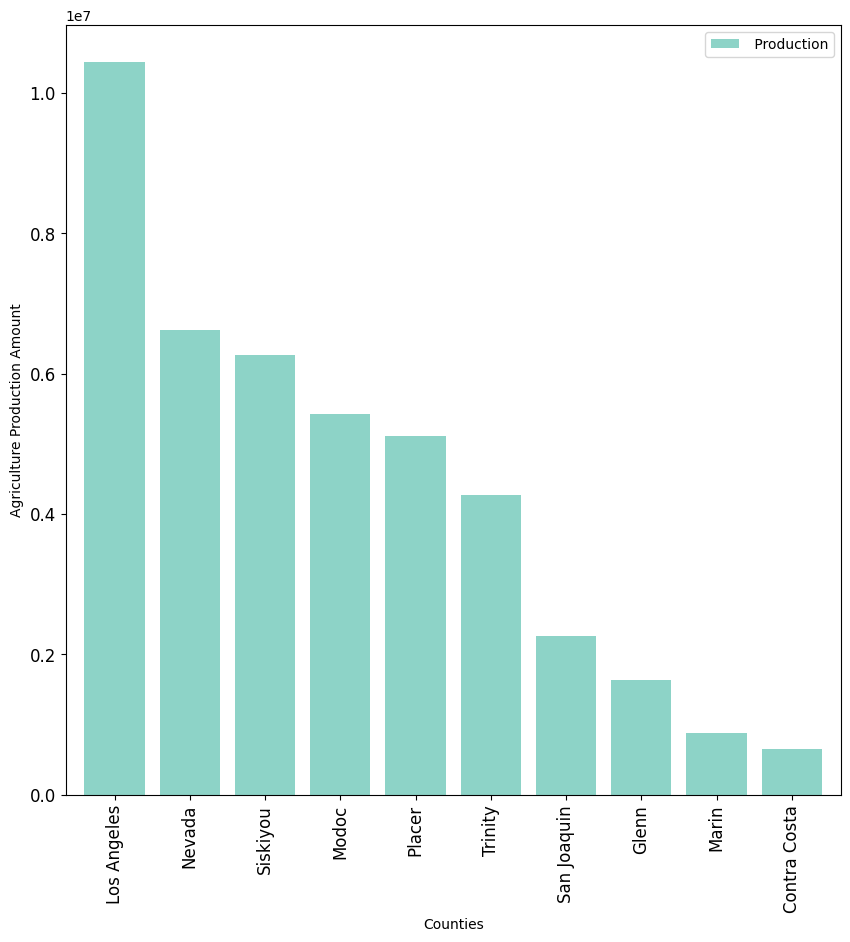

In [17]:
county_crop_total = df.groupby(['CountyName']).sum(numeric_only=True).drop(columns=['CountyIds']).sort_values(by=['CountyName'])
county_prod_total = county_crop_total.drop(columns=[county_crop_total.columns[1],county_crop_total.columns[2]]).sort_values(by=county_crop_total.columns[0],ascending=False).head(10)

ax = county_prod_total.plot.bar(figsize=(10,10),
                                width=0.8,
                                colormap='Set3',
                                fontsize=12,
                                align='center')

#Labeling x y axis
ax.set_ylabel('Agriculture Production Amount',fontsize=10)
ax.set_xlabel('Counties',fontsize=10)

#Title graph
plt.title(f"Top Ten Counties With The Highest Production",fontsize=20)

#Relabing y axis ticks
#ax.set_yticklabels(rate_sort_db['Site ID'].unique())

#Removing the Legend
ax.legend_ = None

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='edge',fontsize=10)

plt.savefig("HighestProductionCounties.png",bbox_inches='tight',dpi=100,transparent=True)